In [27]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
data_train_path = "Currency/train/"
data_test_path = "Currency/test/"
data_val_path = "Currency/validation/"

In [22]:
data_train =tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size =32,
    validation_split =False)

Found 493 files belonging to 5 classes.


In [23]:
data_cat = data_train.class_names

In [25]:
data_cat

['British Pound (GBP)',
 'Canadian Dollar (CAD)',
 'Dollar (USD)',
 'Euro(EUR)',
 'Japanese Yen (JPY)']

In [26]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size =32,
    validation_split =False)

Found 51 files belonging to 5 classes.


In [30]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      shuffle=True,
                                                      image_size=(img_width, img_height),
                                                      batch_size=32,
                                                      validation_split=False)

Found 51 files belonging to 5 classes.


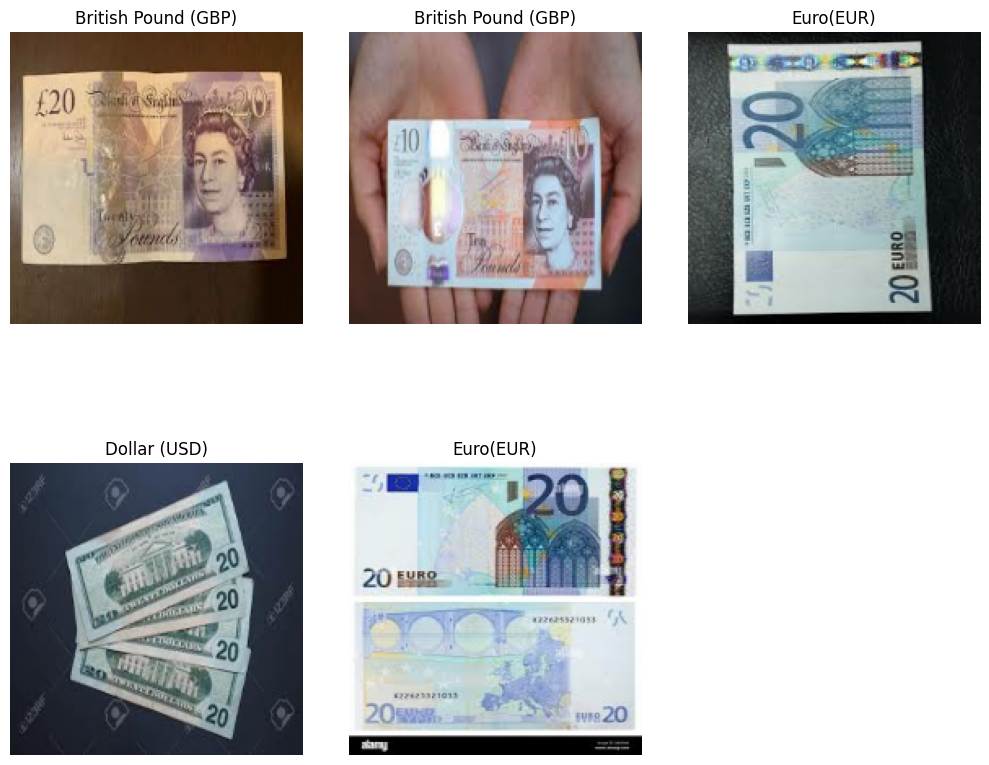

In [38]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range((len(data_cat))):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding ="same", activation ="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding ="same", activation ="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])

In [41]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =["accuracy"])

In [42]:
epochs_size =25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, verbose=2)

Epoch 1/25
16/16 - 2s - 105ms/step - accuracy: 0.2312 - loss: 2.7118 - val_accuracy: 0.1765 - val_loss: 1.6006
Epoch 2/25
16/16 - 1s - 70ms/step - accuracy: 0.2759 - loss: 1.5518 - val_accuracy: 0.1961 - val_loss: 1.6350
Epoch 3/25
16/16 - 1s - 70ms/step - accuracy: 0.3976 - loss: 1.4372 - val_accuracy: 0.2941 - val_loss: 1.4394
Epoch 4/25
16/16 - 1s - 73ms/step - accuracy: 0.5355 - loss: 1.1840 - val_accuracy: 0.4902 - val_loss: 1.2393
Epoch 5/25
16/16 - 1s - 69ms/step - accuracy: 0.6755 - loss: 0.8903 - val_accuracy: 0.5098 - val_loss: 1.4680
Epoch 6/25
16/16 - 1s - 69ms/step - accuracy: 0.7890 - loss: 0.6460 - val_accuracy: 0.6275 - val_loss: 1.3302
Epoch 7/25
16/16 - 1s - 69ms/step - accuracy: 0.8458 - loss: 0.5088 - val_accuracy: 0.5882 - val_loss: 2.1471
Epoch 8/25
16/16 - 1s - 71ms/step - accuracy: 0.8763 - loss: 0.4207 - val_accuracy: 0.6078 - val_loss: 2.2837
Epoch 9/25
16/16 - 1s - 69ms/step - accuracy: 0.9189 - loss: 0.2568 - val_accuracy: 0.5882 - val_loss: 2.5337
Epoch 10/

Text(0.5, 1.0, 'Loss')

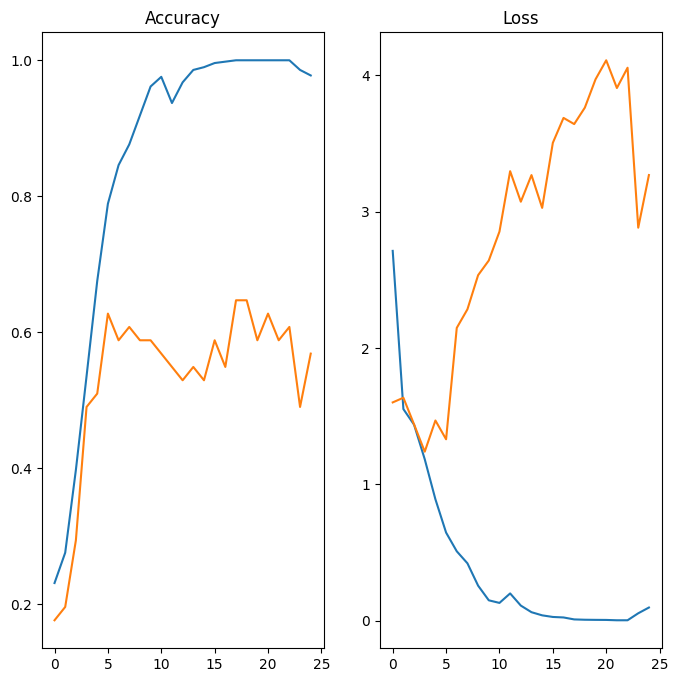

In [43]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history["accuracy"],label ="Training Accuracy")
plt.plot(epochs_range, history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history["loss"],label ="Training Loss")
plt.plot(epochs_range, history.history["val_loss"],label="Validation Loss")
plt.title("Loss")

In [46]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import img_to_array

img = Image.open("euro.jpeg").resize((180, 180))
img_arr = img_to_array(img)
img_bat = np.expand_dims(img_arr, axis=0)

In [48]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [49]:
score =tf.nn.softmax(predict)

In [50]:
print("Currency in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)], np.max(score)*100))

Currency in image is Euro(EUR) with accuracy of 100.00


In [51]:
model.save("Currency_classify.keras")